# FAKE REVIEW DETECTION


## Seattle University
## Instructor: Dr. Kim
## Student: Huy Le

### Readme
This notebook contains entire of my code about my fake review detection research. It includes from the first step to get data from "yelpreview021302.csv" to implement machine learning models. If your computer can not execute the whole file due to the contrains of memory, you may think about break the code to many part such as Data Preprocessing, NLP (Tokenizing, TF-IDF, Consine Similarity, Sentiment Analysis), Clustering, Classifying Model, Decision Tree Diagram Generation.

## TOC:
* [1. Import Libraries and Dataset](#1st-bullet)
* [2. Summary Statistic](#2nd-bullet)
* [3. Data Preprocessing](#3rd-bullet)
* [4. Second Bullet Header](#4th-bullet)
* [5. Second Bullet Header](#5th-bullet)
* [6. Second Bullet Header](#6th-bullet)
* [7. Second Bullet Header](#7th-bullet)


# 1. Import Libraries and Dataset <a class="anchor" id="1st-bullet"></a>

The dataset I used in this research was acquire from Dr. Liu at Unversity of Illinois at Chicago. I had done some integration and preprocessing steps in SQL before I came up to this datasets. For more detail about my dataset, pleas read my paper.

In [51]:
# import necessary libraries
import sys
import nltk
import sklearn
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
nltk.download('stopwords') 



[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [52]:
# load the dataset
raw_data= pd.read_csv('./yelpreview021302.csv')
raw_data.head(5)

In [54]:

# I only chose review with flagged N an Y which mean non-filterd and filterd review.
raw_data = raw_data.loc[(raw_data['flagged'] !='NR') & (raw_data['flagged']!='YR') ]
raw_data.head(5)

,reviewid,reviewerid,businessid,reviewcontent,reviewrating,reusefulcount,recoolcount,refunnycount,reviewDate,yelpjoindate,...,buscateg,pricerange,filreviewcount,monmembership,firstreview,maxReviewDay,avgReviewDay,avgpostedrating,avgreviewlen,flagged
0,LGCYk,KJmXsA1zFPH-n6r14JcYLw,SfRCNiCTPfGwzHEM_hCVZQ,I came here with a group of people for a birth...,4,0,0,0,4/30/2012,00:00.0,...,Hotels,2.0,6,46,0,7,1,3,711,N
1,GtwU21YOQn-wf4vWRUIx6w,bNYesZ944s6IJVowOnB0iA,pbEiXam9YJL3neCYHGwLUA,"Unlike Next, which we'd eaten at the previous ...",5,0,0,0,9/22/2012,00:00.0,...,Restaurants,4.0,0,36,0,6,1,3,1320,N
2,0LpVTc3,TRKxLC3y-ZvP45e5iilMtw,pbEiXam9YJL3neCYHGwLUA,Probably one of the best meals I've had ever. ...,5,0,0,0,9/22/2012,00:00.0,...,Restaurants,4.0,0,15,0,4,2,4,241,N
3,V0PU0ciEBeNiHHS1,-3Mzc2O6jmYLWQJcIJdvAA,pbEiXam9YJL3neCYHGwLUA,Today marks one year since my dinner at Alinea...,5,1,1,0,9/11/2012,00:00.0,...,Restaurants,4.0,0,64,0,4,1,3,1108,N
4,tOC0u8KRXVJdYT9mFTEwvw,lXG7Mbhi6_nXaTZojpneUg,pbEiXam9YJL3neCYHGwLUA,Best restaurant I have ever visited in the Uni...,5,0,0,0,7/2/2012,00:00.0,...,Restaurants,4.0,0,0,0,16,2,3,789,N


In [55]:
# Create a sample with 10000 observation with 50:50 fake and non-fake review.
#df = raw_data.sample(5000).groupby('flagged').head(5000)
fn = lambda obj: obj.loc[np.random.choice(obj.index, 5000, True),:]
df = raw_data.groupby('flagged', as_index=False).apply(fn)
df = shuffle(df)
df.reset_index(drop=True, inplace=True)


In [57]:
df[['flagged','buscateg','pricerange','firstreview']].head(10)

,flagged,buscateg,pricerange,firstreview
0,Y,Restaurants,2.0,0
1,Y,Restaurants,3.0,0
2,Y,Restaurants,2.0,0
3,Y,Restaurants,2.0,0
4,Y,Restaurants,2.0,0
5,N,Restaurants,2.0,0
6,Y,Restaurants,1.0,0
7,N,Hotels,3.0,0
8,Y,Restaurants,2.0,0
9,N,Hotels,3.0,0


# 2 Summarise statistic <a class="anchor" id="2nd-bullet"></a>
- proportion of fake and non fake in dataset
- the corelation between "flagged and other feature"

## 2.1 Sumarize statistic

In [58]:
# Summarize statistic
print(round(df.describe(),2))
df.isna().sum()

       reviewrating  reusefulcount  recoolcount  refunnycount  friendcount  \
count      10000.00       10000.00     10000.00      10000.00     10000.00   
mean           3.78           0.45         0.27          0.25        32.04   
std            1.31           1.63         1.34          1.28       165.98   
min            1.00           0.00         0.00          0.00         0.00   
25%            3.00           0.00         0.00          0.00         0.00   
50%            4.00           0.00         0.00          0.00         1.00   
75%            5.00           0.00         0.00          0.00        14.00   
max            5.00          57.00        52.00         54.00      4924.00   

       fancount  tipcount  reviewcount  firstcount  usefulcount      ...       \
count  10000.00  10000.00     10000.00    10000.00     10000.00      ...        
mean       3.15      8.50        65.26        4.80       123.66      ...        
std       19.61     45.32       163.48       25.21    

reviewid           0
reviewerid         0
businessid         0
reviewcontent      0
reviewrating       0
reusefulcount      0
recoolcount        0
refunnycount       0
reviewDate         0
yelpjoindate       0
friendcount        0
fancount           0
tipcount           0
reviewcount        0
firstcount         0
usefulcount        0
coolcount          0
complimentcount    0
funnycount         0
busrating          0
buscateg           0
pricerange         0
filreviewcount     0
monmembership      0
firstreview        0
maxReviewDay       0
avgReviewDay       0
avgpostedrating    0
avgreviewlen       0
flagged            0
dtype: int64

In [59]:
df['pricerange'] = df['pricerange'].fillna(0.0)

In [60]:
# checking data distribution
Y = df['flagged']

print(Y.value_counts())

print('% filtered reviews: {}'.format(round(Y.value_counts()[0]/len(Y)*100),3))
print('% non-filtered reviews: {}'.format(round(Y.value_counts()[1]/len(Y)*100),2))

Y    5000
N    5000
Name: flagged, dtype: int64
% filtered reviews: 50.0
% non-filtered reviews: 50.0


In [2]:
#Export dataset to CSV file 
#df.to_csv('sampleof10k.csv')

# 3. Data Preprocessing  <a class="anchor" id="3rd-bullet"></a>
## 3.1 Textual Data Cleaning

steps:
- text feature genereate: 
    - n-gram
    - Part of Spech
    - TF-IDF
    - Cosine Similarity
- sentiment analysis



In [61]:
from sklearn.preprocessing import LabelEncoder

In [3]:
# store the review content and non-text features to diff dataframe
df['flagged'] = df['flagged'].astype('category')
df['buscateg'] = df['buscateg'].astype('category')
df['pricerange'] = df['pricerange'].astype('category')
df['firstreview'] = df['firstreview'].astype('category')


review_content = df['reviewcontent']
behavior_attr = df[['reviewrating',
                    'reusefulcount',
                    'recoolcount',
                    'refunnycount',
                    'friendcount',
                    'fancount',
                    'tipcount',
                    'reviewcount',
                    'firstcount',
                    'usefulcount',
                    'coolcount',
                    'complimentcount',
                    'funnycount',
                    'busrating',
                    'buscateg',
                    'pricerange',
                    'monmembership',
                    'firstreview',
                    'maxReviewDay',
                    'avgReviewDay',
                    'avgpostedrating',
                    'avgreviewlen'
                    ]]

# replace NaN with space
review_content = review_content.fillna('')



# convert class labels to binary values, 0 = ham and 1 = spam
encoder = LabelEncoder()
Y = encoder.fit_transform(df['flagged'])

behavior_attr['buscateg'] =  encoder.fit_transform(behavior_attr['buscateg'])
behavior_attr['pricerange'] = encoder.fit_transform(behavior_attr['pricerange'])
behavior_attr['firstreview'] = encoder.fit_transform(behavior_attr['firstreview'])

print(review_content[:10])

NameError: name 'df' is not defined

In [63]:
# use regular expressions to replace email address, URLs, Phone numbers, other numbers

# Replace email addresses with 'email'
processed = review_content.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                      'emailaddress')

# Replace URLs with 'webaddress'
processed = processed.str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                   'webaddress')

# Replace moneu symbols with 'moneysymb' (€,£)
processed = processed.str.replace(r'€|\$|£', 'moneysymb')

# replace 10 digit phone numbers (formats include paranthesis, space, no space, dashes) with phonenumber
processed = processed.str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                 'phonenumber')

#replace numbers with 'number'
processed = processed.str.replace(r'\d+(\.\d+)?','number')

In [64]:
# Remove Punctuation
processed = processed.str.replace(r'[^\w\d\s]', ' ')

# replace whitespac between terms with a single space
processed = processed.str.replace(r'\s+',' ') 

# remove leading and trailing whitespace
processed = processed.str.replace(r'^\s+|\s+?$','')

In [65]:
# change words to lower case
processed = processed.str.lower()
print(processed)

0       the food is hit or miss and with great breakfa...
1       great servie and great food my gf and i have b...
2       i had dinner here this place is amazing i had ...
3       good food but service needs to learn english w...
4                             great place incredible food
5       came here for my birthday this year and of cou...
6       just ordered our first delivery pizza thru fog...
7       number stars we stayed here for three nights o...
8       if you can appreciate a really good burger the...
9       i have stayed here number times in the past nu...
10      this place seriously never disappoints we came...
11      amazing comfort food not too expensive for the...
12      i had the trio steak en tree with the differen...
13      the atmosphere is very romantic with low light...
14      super sad because i found this bakery just a f...
15      went for sunday brunch and sat outside on thei...
16      this place is definitely somewhere you should ...
17      the ow

In [66]:
# remove stopwords from review
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

processed = processed.apply(lambda x: ' '.join(
            term for term in x.split() if term not in stop_words))

In [67]:
print(processed)

0       food hit miss great breakfast places city swee...
1       great servie great food gf sunda couple times ...
2       dinner place amazing best yummiest indian food...
3       good food service needs learn english came che...
4                             great place incredible food
5       came birthday year course disappointed deal sc...
6       ordered first delivery pizza thru fogo deliver...
7       number stars stayed three nights recent trip c...
8       appreciate really good burger absolutely enjoy...
9       stayed number times past number days thoroughl...
10      place seriously never disappoints came friday ...
11      amazing comfort food expensive gold coast thin...
12      trio steak en tree different crust topping rec...
13      atmosphere romantic low lighting nice music pl...
14      super sad found bakery months moved addicted m...
15      went sunday brunch sat outside nice patio back...
16      place definitely somewhere go great conversati...
17      owner 

In [68]:
# remove word stems using a Porter stemmer
ps = nltk.PorterStemmer()

processed = processed.apply(lambda x: ' '.join(
            ps.stem(term) for term in x.split()))


In [69]:
#processed.to_csv('processed_content.csv', header ='review_content')

# 4 Generate Text features


## 4.1 Part of Speech

In [4]:
# create part of speech represents of review content

from nltk import word_tokenize, pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

#tokenized review into word
#word_tok = processed.apply(word_tokenize)
#print(word_tok.head(10))


NameError: name 'nltk' is not defined

In [81]:
# [('I', 'PRP'), ("'m", 'VBP'), ('learning', 'VBG'), ('NLP', 'NNP')]
pos = processed.apply(word_tokenize).apply(pos_tag)

In [82]:
for i, sent in enumerate(pos):
    pos[i] =' '.join([word + '_' + postag for word, postag in sent])

In [83]:
print(pos[:10])


0    food_NN hit_VBD miss_JJ great_JJ breakfast_NN ...
1    great_JJ servie_NN great_JJ food_NN gf_NN sund...
2    dinner_NN place_NN amazing_VBG best_JJS yummie...
3    good_JJ food_NN service_NN needs_VBZ learn_JJ ...
4              great_JJ place_NN incredible_JJ food_NN
5    came_VBD birthday_JJ year_NN course_NN disappo...
6    ordered_VBN first_JJ delivery_NN pizza_NN thru...
7    number_NN stars_NNS stayed_VBD three_CD nights...
8    appreciate_NN really_RB good_JJ burger_NN abso...
9    stayed_VBN number_NN times_NNS past_JJ number_...
Name: reviewcontent, dtype: object


## 4.2 Cosine Similarity


In [84]:
# ML Packages For Vectorization of Text For Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

### a. Cosine Similarity by N-grams

In [85]:
corpus = processed
# using Uni-gram because bi-gram or trigram take too long to generate, but did show difference between reviews
#cv = CountVectorizer(analyzer='word', ngram_range=(2, 2))
#X_cv = cv.fit_transform(corpus) # Fit the Data

# create fi-idf vector
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1,1)) # create tf-idf vector based unigram, Range(1,1) mean n =[1,1]
#X_tfidf= tfidf.fit_transform(corpus)

In [86]:
# create cosine similarity by tf-idf vector
CS_similarity_bigram =cosine_similarity(tfidf.fit_transform(corpus))

In [87]:
# get the feature shape
CS_similarity_bigram.shape

(10000, 10000)

In [88]:
CS_similarity_bigram

array([[1.        , 0.02315172, 0.00876211, ..., 0.        , 0.036431  ,
        0.04300472],
       [0.02315172, 1.        , 0.0493819 , ..., 0.01959317, 0.06073143,
        0.0817795 ],
       [0.00876211, 0.0493819 , 1.        , ..., 0.03960129, 0.01299416,
        0.02687792],
       ...,
       [0.        , 0.01959317, 0.03960129, ..., 1.        , 0.03709863,
        0.04238176],
       [0.036431  , 0.06073143, 0.01299416, ..., 0.03709863, 1.        ,
        0.03819221],
       [0.04300472, 0.0817795 , 0.02687792, ..., 0.04238176, 0.03819221,
        1.        ]])

In [89]:
#del CS_similarity_bigram

### b. Cosine Similarity by Part of Speech

In [90]:
corpus = pos
# create fi-idf vector base on POS
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 1))
pos_tfidf= tfidf.fit_transform(corpus)

#print(pos_tfidf.shape)

In [91]:
tfidf.get_feature_names()

['______nnp',
 '__nn',
 '__nnp',
 '_number_nnp',
 'aa_vb',
 'aaa_jj',
 'aaa_nn',
 'aaaaah_nn',
 'aaaand_nn',
 'aaah_jj',
 'aaargh_in',
 'aacckkk_nn',
 'aagain_jj',
 'aahs_nn',
 'aak_rb',
 'aaron_nn',
 'aaron_vbp',
 'aback_nn',
 'aback_rb',
 'aback_rp',
 'abandoned_jj',
 'abandoned_vbn',
 'abbey_jj',
 'abby_nn',
 'abeba_nn',
 'aberration_nn',
 'abide_in',
 'abide_rb',
 'abide_vb',
 'abilities_nns',
 'ability_nn',
 'abinthe_nn',
 'abismal_jj',
 'abit_nn',
 'abit_rb',
 'able_jj',
 'abnormal_jj',
 'abnormal_nn',
 'abolutely_rb',
 'abominable_jj',
 'abominations_nns',
 'aborted_vbd',
 'aboslute_nn',
 'abound_vbp',
 'aboutthat_rb',
 'abovementioned_vbn',
 'abra_in',
 'abrasive_jj',
 'abrazo_nn',
 'abridged_vbn',
 'abroad_rb',
 'abrupt_jj',
 'abruptly_rb',
 'abs_jj',
 'absconded_vbd',
 'absence_nn',
 'absent_jj',
 'absentee_jj',
 'absinthe_jj',
 'absinthe_nn',
 'absoloutely_rb',
 'absolut_nn',
 'absolute_jj',
 'absolute_nn',
 'absolute_vbp',
 'absolutely_rb',
 'absolutly_rb',
 'absorb_jj',
 '

In [92]:
import time

In [93]:
import time
start_time = time.time()

# create cosine similarity by tf-idf vector
CS_similarity_pos =cosine_similarity(pos_tfidf)

print("--- %s seconds ---" % (time.time() - start_time))

--- 3.8835015296936035 seconds ---


In [95]:
CS_similarity_pos

array([[1.        , 0.01919377, 0.00823067, ..., 0.        , 0.02049023,
        0.04011572],
       [0.01919377, 1.        , 0.04307507, ..., 0.01511245, 0.05320423,
        0.06455132],
       [0.00823067, 0.04307507, 1.        , ..., 0.        , 0.00402454,
        0.01745411],
       ...,
       [0.        , 0.01511245, 0.        , ..., 1.        , 0.02888037,
        0.        ],
       [0.02049023, 0.05320423, 0.00402454, ..., 0.02888037, 1.        ,
        0.03441654],
       [0.04011572, 0.06455132, 0.01745411, ..., 0.        , 0.03441654,
        1.        ]])

In [96]:
# this chunk is used to save the cosine similarity matrix
# Use if you want separate my code to overcome memory exceed

# import pickle
# # #save variable
# with open('CS_similarity_pos', 'wb') as f:
#     pickle.dump(CS_similarity_pos, f)

# with open('CS_similarity_bigram', 'wb') as f:
#     pickle.dump(CS_similarity_bigram, f)
   
#load variable
#with open(filename, ‘rb’) as f:
    #var_you_want_to_load_into = pickle.load(f)

In [97]:
# cs_matrix = CS_similarity_pos

# for i in range(0, cs_matrix.shape[0]):
#     cs_matrix[i,i] =0

In [98]:
#cs_matrix

## 4.3 Sentiment analysis


In [99]:
from textblob import TextBlob 
from textblob.sentiments import NaiveBayesAnalyzer

#Example how to get sentiment score of a text
#rv_sentiment = TextBlob("Came in on the early afternoon on Sunday. The food was tasty and priced well.",analyzer=NaiveBayesAnalyzer()).sentiment


### ** Note **
Because NaiveBayesAnalyzer() take too long to analyze the sentiment of whole dataset. I had tested and it take me more than 4hours. So, I choose move forward with pattern analyzer

In [100]:
# Polarity and subjectivity
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

# generate polarity and subjectivity then add them to behavior_attr dataframe
behavior_attr['polarity'] = processed.apply(pol)
behavior_attr['subjective'] = processed.apply(sub)

#reve_pos = []
#reve_pos += [TextBlob(x, analyzer= NaiveBayesAnalyzer()).sentiment.p_pos  for x in processed]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [101]:
#behavior_attr.to_csv('behavior_attr.csv')

In [102]:
# Let's plot the results
# import matplotlib.pyplot as plt

# plt.rcParams['figure.figsize'] = [10, 8]

# x = polarity
# y = subjective
# plt.scatter(x, y, color='blue')
# #plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
# plt.xlim(-.01, .12) 
    
# plt.title('Sentiment Analysis', fontsize=20)
# plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
# plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

# plt.show()

### Behavior feature
- behavior_attr: behavioral attributes
### Text_feature
- processed: text content
- polarity: polarity of review
- subjective: subjectivity of review
- CS_similarity_pos: consine similarity generated from POS
- CS_similarity_bigram: cosine similarity generated from bi-gram

# 5 Clusstering

## 5.1 Clustering with PoS-based cosine similarity

In [107]:
from sklearn.mixture import GaussianMixture


def em_clustering(X, k ):
    gmm = GaussianMixture(n_components=k, random_state= 138)
    gmm.fit(X)
    return gmm



In [108]:
# em Clustering
start_time = time.time()
k= 5 
gmm = em_clustering(CS_similarity_pos,k)


print("--- %s seconds ---" % (time.time() - start_time))

--- 742.4926126003265 seconds ---


In [109]:
import gc
gc.collect()

0

In [111]:
cluster_pos = gmm.predict(CS_similarity_pos)

cluster_pos[:10]

array([2, 1, 1, 2, 1, 0, 0, 4, 2, 3])

In [112]:
#plot clustering result
dt_plt = pd.DataFrame({'Cluster':cluster_pos})
dt_plt =pd.DataFrame({'Cluster':dt_plt.groupby('Cluster')['Cluster'].count().index, 'count': dt_plt.groupby('Cluster')['Cluster'].count()})

In [113]:
dt_plt

,Cluster,count
Cluster,,
0,0,2850
1,1,866
2,2,3799
3,3,1053
4,4,1432


In [114]:
#visualizing
import itertools
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl


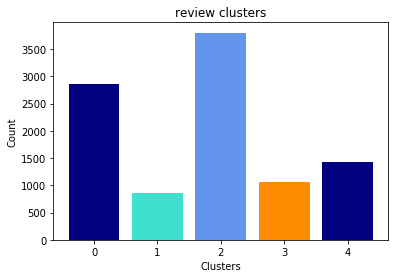

In [115]:
color_iter = ['navy', 'turquoise', 'cornflowerblue','darkorange']
plt.figure(figsize=(6,6))
plt.bar(dt_plt['Cluster'], dt_plt['count'],  color=color_iter )
plt.xlabel('Clusters')
plt.xticks(dt_plt['Cluster'])
plt.ylabel('Count')
plt.title('Review Clustering by POS Cosine Similarity')

for x,y in zip(dt_plt['Cluster'], dt_plt['count']):
    plt.annotate('{}'.format(y ),
                 xy=(x , y + 10),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')
plt.show()

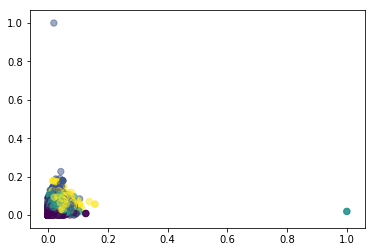

In [116]:
# This plot visualize cluster based on the cosine similarity among the reviews

plt.scatter(CS_similarity_pos[:, 0], CS_similarity_pos[:, 1], c=cluster_pos, s=40, cmap='viridis', alpha =0.5)
plt.show()

In [117]:
# def draw_ellipse(position, covariance, ax=None, **kwargs):
#     """Draw an ellipse with a given position and covariance"""
#     ax = ax or plt.gca()
    
#     # Convert covariance to principal axes
#     if covariance.shape == (2, 2):
#         U, s, Vt = np.linalg.svd(covariance)
#         angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
#         width, height = 2 * np.sqrt(s)
#     else:
#         angle = 0
#         width, height = 2 * np.sqrt(covariance)
    
#     # Draw the Ellipse
#     for nsig in range(1, 4):
#         ax.add_patch(Ellipse(position, nsig * width, nsig * height,
#                              angle, **kwargs))
        
# def plot_gmm(gmm, lables_, X, label=True, ax=None):
#     ax = ax or plt.gca()
#     labels = lables_
#     if label:
#         ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
#     else:
#         ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
#     ax.axis('equal')
    
#     w_factor = 0.2 / gmm.weights_.max()
#     for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
#         draw_ellipse(pos, covar, alpha=w * w_factor)

In [ ]:
#plot_gmm(gmm,cluster_pos, CS_similarity_pos)

## 5.2 Clustering with uni-gram-based Cosine similarity 

In [118]:
from sklearn.mixture import GaussianMixture


# em Clustering
start_time = time.time()
gmm = em_clustering(CS_similarity_bigram,k)
print("--- %s seconds ---" % (time.time() - start_time))

--- 743.0532357692719 seconds ---


In [119]:
cluster_ngram = gmm.predict(CS_similarity_bigram)

cluster_ngram[:10]

array([3, 1, 3, 3, 1, 0, 0, 4, 3, 4])

In [120]:
#plot clustering result
dt_plt = pd.DataFrame({'Cluster':cluster_ngram})
dt_plt = dt_plt.groupby('Cluster')['Cluster'].count()

In [121]:
dt_plt

Cluster
0    2544
1     913
2    1714
3    3717
4    1112
Name: Cluster, dtype: int64

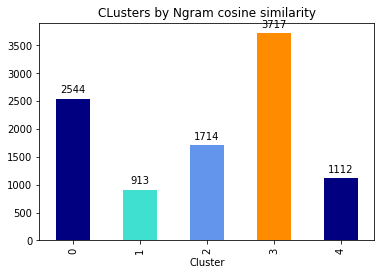

In [122]:
#visualizing clusters

color_iter = ['navy', 'turquoise', 'cornflowerblue','darkorange']

dt_plt.plot(kind ='bar', color = color_iter)
for x,y in zip(dt_plt.index, dt_plt):
    plt.annotate('{}'.format(y ),
                 xy=(x , y + 10),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')
plt.title('CLusters by Ngram cosine similarity')
plt.show()

## 5.3 Integration cluster label with behavioral features

In [123]:
df_pos=pd.concat([behavior_attr,
                 pd.DataFrame({'cluster':cluster_pos}).reindex(behavior_attr.index)],
#                  pd.DataFrame({'polarity':polarity}).reindex(behavior_attr.index),
#                  pd.DataFrame({'subjective':subjective}).reindex(behavior_attr.index)],
                 #pd.DataFrame(CS_similarity_bigram).reindex(behavior_attr.index)], 
                 axis=1) 
df_ngram=pd.concat([behavior_attr,
                 pd.DataFrame({'cluster':cluster_ngram}).reindex(behavior_attr.index)],
#                  pd.DataFrame({'polarity':polarity}).reindex(behavior_attr.index),
#                  pd.DataFrame({'subjective':subjective}).reindex(behavior_attr.index)],
#                  #pd.DataFrame(CS_similarity_bigram).reindex(behavior_attr.index)], 
                 axis=1) 

In [ ]:
df_pos.to_csv('df_pos.csv')
df_ngram.to_csv('df_ngram.csv')

In [75]:
df_pos.head(10)

,reviewrating,reusefulcount,recoolcount,refunnycount,friendcount,fancount,tipcount,reviewcount,firstcount,usefulcount,...,pricerange,monmembership,firstreview,maxReviewDay,avgReviewDay,avgpostedrating,avgreviewlen,polarity,subjective,cluster
0,5,0,0,0,0,0,0,1,0,0,...,1,0,0,1,1,5,76,0.500000,0.583333,7
1,4,0,0,0,1,0,0,18,0,5,...,2,0,0,9,3,3,299,0.585714,0.614286,2
2,5,0,0,0,1,0,0,1,0,0,...,1,0,0,1,1,5,196,0.700000,0.925000,2
3,5,0,0,0,0,0,0,4,0,0,...,0,0,0,2,2,4,371,1.000000,0.300000,0
4,1,0,0,0,0,0,0,2,0,7,...,1,0,0,1,1,3,1042,0.123684,0.271930,3
5,5,0,0,0,0,0,0,4,1,1,...,1,0,0,2,1,2,840,0.328169,0.470000,4
6,4,0,0,0,0,0,0,1,0,0,...,2,0,0,1,1,4,22,0.800000,0.750000,1
7,4,0,0,0,10,0,0,251,1,87,...,0,28,0,19,2,3,616,0.340009,0.515731,3
8,1,1,0,0,7,0,0,20,1,41,...,1,29,0,5,2,3,1421,0.251515,0.590909,3
9,3,0,0,0,70,10,10,260,15,165,...,0,28,0,19,2,3,644,0.057639,0.493750,1


# 6 Building classify model

## 6.1 Features Selection based logistic regression

In [124]:
import statsmodels.api as sm

X = df_pos
y = Y
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)



/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:36: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.


Add  monmembership                  with p-value 0.0
Add  maxReviewDay                   with p-value 1.96502e-175
Add  avgReviewDay                   with p-value 1.57181e-82
Add  reusefulcount                  with p-value 6.94187e-65
Add  recoolcount                    with p-value 1.26947e-23
Add  avgreviewlen                   with p-value 3.41336e-18
Add  coolcount                      with p-value 3.73116e-14
Add  reviewrating                   with p-value 5.37516e-14
Add  tipcount                       with p-value 1.72092e-10
Add  pricerange                     with p-value 5.5973e-06
Add  avgpostedrating                with p-value 2.82165e-05
Add  polarity                       with p-value 0.0014789
Add  firstcount                     with p-value 0.00142852
Add  reviewcount                    with p-value 0.00105509
resulting features:
['monmembership', 'maxReviewDay', 'avgReviewDay', 'reusefulcount', 'recoolcount', 'avgreviewlen', 'coolcount', 'reviewrating', 'tipcount',

In [125]:
df_filtered = df_pos[['monmembership', 'maxReviewDay', 'reusefulcount', 'avgReviewDay', 'complimentcount', 'avgreviewlen', 'reviewrating', 'avgpostedrating', 'recoolcount', 'tipcount', 'buscateg', 'polarity', 'fancount', 'firstreview', 'subjective', 'cluster']]

## 6.2 Svm model
### a. Pos similarity

In [126]:
# entire dataset
# test building classify model with consine similarity
# we can split the featuresets into training and testing datasets using sklearn
from sklearn import model_selection
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import StandardScaler
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.svm import SVC
from sklearn import metrics


In [143]:

def fit_SVM_(X,Y, kernel ='rbf'):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=138) 
    scaler = StandardScaler()  
    scaler.fit(X)
    X_train = scaler.transform(X_train)  
    X_test = scaler.transform(X_test)
    # SVM kernel: ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed
    # standardize the independent variable
    svclassifier = SVC(kernel='rbf')    	## Linear SVM
    svclassifier.fit(X_train, y_train)  
    y_pred = svclassifier.predict(X_test)  	## predict test se
    print(metrics.confusion_matrix(y_test, y_pred))
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Error rate:", 1-metrics.accuracy_score(y_test, y_pred))
    print("Recall:", metrics.recall_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred))
    print('{} {} {} {}'.format(metrics.accuracy_score(y_test, y_pred),
                   1-metrics.accuracy_score(y_test, y_pred),
                   metrics.recall_score(y_test, y_pred),
                   metrics.precision_score(y_test, y_pred)))


In [149]:
import time
start_time = time.time()

fit_SVM_(df_pos,Y, kernel ='rbf')

print("--- %s seconds ---" % (time.time() - start_time))


[[781 201]
 [ 75 943]]
Accuracy: 0.862
Error rate: 0.138
Recall: 0.9263261296660118
Precision: 0.8243006993006993
0.862 0.138 0.9263261296660118 0.8243006993006993
--- 2.429598569869995 seconds ---


In [140]:
for i in range(0,k):
    df_cluster0 = df_pos[df_pos['cluster'] == i]
    Y = pd.Series(Y)
    print('\n Classifying in cluster: {}'.format(i))
    fit_SVM_(df_cluster0.drop('cluster',axis=1),Y.iloc[df_cluster0.index], kernel ='rbf')


 Classifying in cluster: 0
[[186  64]
 [ 31 289]]
Accuracy: 0.8333333333333334
Error rate: 0.16666666666666663
Recall: 0.903125
Precision: 0.8186968838526912
0.8333333333333334 0.16666666666666663 0.903125 0.8186968838526912 

 Classifying in cluster: 1
[[ 32  23]
 [  6 113]]
Accuracy: 0.8333333333333334
Error rate: 0.16666666666666663
Recall: 0.9495798319327731
Precision: 0.8308823529411765
0.8333333333333334 0.16666666666666663 0.9495798319327731 0.8308823529411765 

 Classifying in cluster: 2
[[324  61]
 [ 31 344]]
Accuracy: 0.8789473684210526
Error rate: 0.12105263157894741
Recall: 0.9173333333333333
Precision: 0.8493827160493828
0.8789473684210526 0.12105263157894741 0.9173333333333333 0.8493827160493828 

 Classifying in cluster: 3
[[112  17]
 [ 15  67]]
Accuracy: 0.8483412322274881
Error rate: 0.15165876777251186
Recall: 0.8170731707317073
Precision: 0.7976190476190477
0.8483412322274881 0.15165876777251186 0.8170731707317073 0.7976190476190477 

 Classifying in cluster: 4
[[13

In [147]:
# withou cluster
fit_SVM_(df_pos.drop('cluster',axis=1),Y, kernel ='rbf' )


[[781 201]
 [ 72 946]]
Accuracy: 0.8635
Error rate: 0.13649999999999995
Recall: 0.9292730844793713
Precision: 0.8247602441150829
0.8635 0.13649999999999995 0.9292730844793713 0.8247602441150829


### b. Unigram

In [107]:
import time
start_time = time.time()

fit_SVM_(df_ngram,Y, kernel ='rbf')

print("--- %s seconds ---" % (time.time() - start_time))


[[797 213]
 [ 55 935]]
Accuracy: 0.866
Error rate: 0.134
Recall: 0.9444444444444444
Precision: 0.8144599303135889
--- 2.5167458057403564 seconds ---


In [122]:
for i in range(0,k):
    df_cluster0 = df_ngram[df_ngram['cluster'] == i]
    Y = pd.Series(Y)
    print('Classifying in cluster: {}'.format(i))
    fit_SVM_(df_cluster0.drop('cluster',axis=1),Y.iloc[df_cluster0.index], kernel ='rbf')

Classifying in cluster: 0
[[82 16]
 [ 6 89]]
Accuracy: 0.8860103626943006
Error rate: 0.11398963730569944
Recall: 0.9368421052631579
Precision: 0.8476190476190476
Classifying in cluster: 1
[[21  6]
 [ 0 32]]
Accuracy: 0.8983050847457628
Error rate: 0.10169491525423724
Recall: 1.0
Precision: 0.8421052631578947
Classifying in cluster: 2
[[18  5]
 [ 0 24]]
Accuracy: 0.8936170212765957
Error rate: 0.1063829787234043
Recall: 1.0
Precision: 0.8275862068965517
Classifying in cluster: 3
[[ 83  31]
 [ 20 152]]
Accuracy: 0.8216783216783217
Error rate: 0.17832167832167833
Recall: 0.8837209302325582
Precision: 0.8306010928961749
Classifying in cluster: 4
[[201  62]
 [ 29 278]]
Accuracy: 0.8403508771929824
Error rate: 0.1596491228070176
Recall: 0.9055374592833876
Precision: 0.8176470588235294
Classifying in cluster: 5
[[231  46]
 [ 20 176]]
Accuracy: 0.8604651162790697
Error rate: 0.13953488372093026
Recall: 0.8979591836734694
Precision: 0.7927927927927928
Classifying in cluster: 6
[[ 27  29]
 [  1

## 6.3 Random Forest Classifiers

In [152]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectFromModel

In [182]:

def RF_selction(X,Y):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=138) 
    sel = SelectFromModel(RandomForestClassifier(n_estimators = 500,max_depth = 100))
    sel.fit(X_train, y_train)
    sel.get_support()
    selected_feat= X_train.columns[(sel.get_support())]
    print(len(selected_feat))
    print(selected_feat)


In [183]:
RF_selction(df_pos,Y)

9
Index(['reusefulcount', 'friendcount', 'reviewcount', 'usefulcount',
       'coolcount', 'complimentcount', 'funnycount', 'monmembership',
       'avgreviewlen'],
      dtype='object')


In [188]:
def RF_classifier(X,Y, 
                  max_features_= 'auto', 
                  n_estimators_ = 100,
                  max_depth_ = None,
                  min_sample_leaf_ = 2):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=138) 
    clf = RandomForestClassifier(max_features = max_features_, 
                                 n_estimators = n_estimators_,
                                 max_depth = max_depth_,
                                 min_samples_leaf = min_sample_leaf_)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)  	## predict test set
    print(metrics.confusion_matrix(y_test, y_pred))
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Error rate:", 1-metrics.accuracy_score(y_test, y_pred))
    print("Recall:", metrics.recall_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred))
    print('{} {} {} {}'.format(metrics.accuracy_score(y_test, y_pred),
                   1-metrics.accuracy_score(y_test, y_pred),
                   metrics.recall_score(y_test, y_pred),
                   metrics.precision_score(y_test, y_pred)))
    return(clf)

In [189]:
clf = RF_classifier(df_pos,Y,n_estimators_=500,min_sample_leaf_= 2, max_depth_ = 100)

[[857 125]
 [ 44 974]]
Accuracy: 0.9155
Error rate: 0.08450000000000002
Recall: 0.9567779960707269
Precision: 0.8862602365787079
0.9155 0.08450000000000002 0.9567779960707269 0.8862602365787079


            feature  importance
9       usefulcount    0.150057
10        coolcount    0.123513
7       reviewcount    0.107604
4       friendcount    0.095748
11  complimentcount    0.068227
12       funnycount    0.066428
16    monmembership    0.063104
1     reusefulcount    0.058786
21     avgreviewlen    0.039708
22         polarity    0.033082


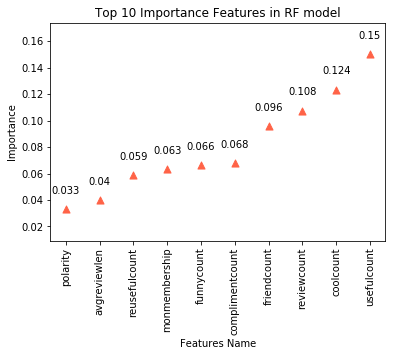

In [233]:
fi = pd.DataFrame({'feature': list(df_pos.columns),
                  'importance': clf.feature_importances_}).\
                   sort_values('importance', ascending = False)
print(fi.head(10))

dfplot = fi.head(10).sort_values('importance', ascending = True)

N=10
colors = np.random.rand(N)
plt.scatter(dfplot['feature'], dfplot['importance'], s =50, c='tomato', alpha=1, marker ='^')
plt.xticks(rotation=90)
plt.xlabel('Features Name')
plt.ylabel('Importance')
plt.title('Top 10 Importance Features in RF model')
for x,y in zip(range(0,11), dfplot['importance']):
    plt.annotate('{}'.format(round(y,3)),
                 xy=(x , y + 0.01),
                 xytext=(0, 0),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.show()

In [159]:
for i in range(0,k):
    df_cluster0 = df_pos[df_pos['cluster'] == i]
    Y = pd.Series(Y)
    print('\nClassifying in cluster: {}'.format(i))
    RF_classifier(df_cluster0.drop('cluster',axis=1),Y.iloc[df_cluster0.index],n_estimators_=500,min_sample_leaf_= 2, max_depth_ = 100)


Classifying in cluster: 0
[[206  44]
 [ 24 296]]
Accuracy: 0.8807017543859649
Error rate: 0.11929824561403513
Recall: 0.925
Precision: 0.8705882352941177
0.8807017543859649 0.11929824561403513 0.925 0.8705882352941177

Classifying in cluster: 1
[[ 42  13]
 [  8 111]]
Accuracy: 0.8793103448275862
Error rate: 0.12068965517241381
Recall: 0.9327731092436975
Precision: 0.8951612903225806
0.8793103448275862 0.12068965517241381 0.9327731092436975 0.8951612903225806

Classifying in cluster: 2
[[348  37]
 [ 16 359]]
Accuracy: 0.9302631578947368
Error rate: 0.06973684210526321
Recall: 0.9573333333333334
Precision: 0.9065656565656566
0.9302631578947368 0.06973684210526321 0.9573333333333334 0.9065656565656566

Classifying in cluster: 3
[[120   9]
 [  7  75]]
Accuracy: 0.9241706161137441
Error rate: 0.07582938388625593
Recall: 0.9146341463414634
Precision: 0.8928571428571429
0.9241706161137441 0.07582938388625593 0.9146341463414634 0.8928571428571429

Classifying in cluster: 4
[[148   5]
 [  5 12

In [174]:
# withou cluster
RF_classifier(df_pos.drop('cluster',axis=1),Y,n_estimators_=150,min_sample_leaf_= 2, max_depth_ = 50 )

[[862 120]
 [ 51 967]]
Accuracy: 0.9145
Error rate: 0.08550000000000002
Recall: 0.949901768172888
Precision: 0.889604415823367
0.9145 0.08550000000000002 0.949901768172888 0.889604415823367


In [173]:
# withou text generated features
RF_classifier(df_pos.drop(['polarity','subjective'],axis=1),Y,n_estimators_=150,min_sample_leaf_= 2, max_depth_ = 50 )

[[861 121]
 [ 51 967]]
Accuracy: 0.914
Error rate: 0.08599999999999997
Recall: 0.949901768172888
Precision: 0.8887867647058824
0.914 0.08599999999999997 0.949901768172888 0.8887867647058824


### b. Bigram

In [161]:
RF_classifier(df_ngram,Y,n_estimators_=150,min_sample_leaf_= 2, max_depth_ = 100 )

[[858 124]
 [ 48 970]]
Accuracy: 0.914
Error rate: 0.08599999999999997
Recall: 0.9528487229862476
Precision: 0.886654478976234
0.914 0.08599999999999997 0.9528487229862476 0.886654478976234


In [163]:
for i in range(0,k):
    df_cluster0 = df_ngram[df_ngram['cluster'] == i]
    Y = pd.Series(Y)
    print('\nClassifying in cluster: {}'.format(i))
    RF_classifier(df_cluster0.drop('cluster',axis=1),Y.iloc[df_cluster0.index],n_estimators_=150,min_sample_leaf_= 2, max_depth_ = 100)


Classifying in cluster: 0
[[203  34]
 [ 18 254]]
Accuracy: 0.8978388998035364
Error rate: 0.10216110019646363
Recall: 0.9338235294117647
Precision: 0.8819444444444444
0.8978388998035364 0.10216110019646363 0.9338235294117647 0.8819444444444444

Classifying in cluster: 1
[[ 48  15]
 [  4 116]]
Accuracy: 0.8961748633879781
Error rate: 0.10382513661202186
Recall: 0.9666666666666667
Precision: 0.8854961832061069
0.8961748633879781 0.10382513661202186 0.9666666666666667 0.8854961832061069

Classifying in cluster: 2
[[148  13]
 [  7 175]]
Accuracy: 0.9416909620991254
Error rate: 0.058309037900874605
Recall: 0.9615384615384616
Precision: 0.9308510638297872
0.9416909620991254 0.058309037900874605 0.9615384615384616 0.9308510638297872

Classifying in cluster: 3
[[349  42]
 [ 15 338]]
Accuracy: 0.9233870967741935
Error rate: 0.0766129032258065
Recall: 0.9575070821529745
Precision: 0.8894736842105263
0.9233870967741935 0.0766129032258065 0.9575070821529745 0.8894736842105263

Classifying in clus

In [164]:
# withou cluster
RF_classifier(df_ngram.drop('cluster',axis=1),Y,n_estimators_=150,min_sample_leaf_= 2, max_depth_ = 100 )

[[853 129]
 [ 49 969]]
Accuracy: 0.911
Error rate: 0.08899999999999997
Recall: 0.9518664047151277
Precision: 0.8825136612021858
0.911 0.08899999999999997 0.9518664047151277 0.8825136612021858


In [ ]:
# withou text generated features
RF_classifier(df_ngram.drop(['cluster','polarity','subjective'],axis=1),Y,n_estimators_=150,min_sample_leaf_= 2, max_depth_ = 100 )

## 6.3 Neural Network

### a. NN with pos similarity

In [167]:
from sklearn.neural_network import MLPClassifier

In [168]:
def NN_classifier(X, Y, hidden_layers_ = (5,2), activation_ ='relu',solver_ ='adam' , alphafloat_ =1e-5):

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=138)

    clf = MLPClassifier(solver=solver_,
                        alpha=alphafloat_,
                        activation =activation_,
                        hidden_layer_sizes= hidden_layers_,
                        random_state=1)

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    cm =  metrics.confusion_matrix(y_test, y_pred)
    print(cm)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Error rate:", 1-metrics.accuracy_score(y_test, y_pred))
    print("Recall:", metrics.recall_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred))
    print('{} {} {} {}'.format(metrics.accuracy_score(y_test, y_pred),
                   1-metrics.accuracy_score(y_test, y_pred),
                   metrics.recall_score(y_test, y_pred),
                   metrics.precision_score(y_test, y_pred)))
#     plt.clf()
#     plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
#     classNames = ['0','1']
#     plt.title('NN Confusion Matrix - Test Data')
#     plt.ylabel('True Class')
#     plt.xlabel('Predicted Class')
#     tick_marks = np.arange(len(classNames))
#     plt.xticks(tick_marks, classNames, rotation=45)
#     plt.yticks(tick_marks, classNames)
#     s = [['TN','FP'], ['FN', 'TP']]
#     for i in range(2):
#         for j in range(2):
#             plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
#     plt.show()

In [176]:
# full clusters

NN_classifier(df_pos,Y,hidden_layers_ =(20,30,40,50), solver_='adam', activation_= 'tanh' )

[[829 153]
 [101 917]]
Accuracy: 0.873
Error rate: 0.127
Recall: 0.9007858546168959
Precision: 0.8570093457943925
0.873 0.127 0.9007858546168959 0.8570093457943925


In [170]:
for i in range(0,k):
    df_cluster0 = df_pos[df_pos['cluster'] == i]
    Y = pd.Series(Y)
    print('\nClassifying in cluster: {}'.format(i))
    NN_classifier(df_cluster0.drop('cluster',axis=1),Y.iloc[df_cluster0.index],hidden_layers_ =(20,30,40,50), solver_='adam', activation_= 'tanh' )


Classifying in cluster: 0
[[196  54]
 [ 39 281]]
Accuracy: 0.8368421052631579
Error rate: 0.16315789473684206
Recall: 0.878125
Precision: 0.8388059701492537
0.8368421052631579 0.16315789473684206 0.878125 0.8388059701492537

Classifying in cluster: 1


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[ 35  20]
 [  6 113]]
Accuracy: 0.8505747126436781
Error rate: 0.14942528735632188
Recall: 0.9495798319327731
Precision: 0.849624060150376
0.8505747126436781 0.14942528735632188 0.9495798319327731 0.849624060150376

Classifying in cluster: 2
[[324  61]
 [ 27 348]]
Accuracy: 0.8842105263157894
Error rate: 0.11578947368421055
Recall: 0.928
Precision: 0.8508557457212714
0.8842105263157894 0.11578947368421055 0.928 0.8508557457212714

Classifying in cluster: 3
[[117  12]
 [ 13  69]]
Accuracy: 0.8815165876777251
Error rate: 0.11848341232227488
Recall: 0.8414634146341463
Precision: 0.8518518518518519
0.8815165876777251 0.11848341232227488 0.8414634146341463 0.8518518518518519

Classifying in cluster: 4
[[142  11]
 [ 11 123]]
Accuracy: 0.9233449477351916
Error rate: 0.0766550522648084
Recall: 0.917910447761194
Precision: 0.917910447761194
0.9233449477351916 0.0766550522648084 0.917910447761194 0.917910447761194


In [172]:
#without cluster
NN_classifier(df_pos.drop('cluster',axis=1),Y,hidden_layers_ =(20,30,40,50), solver_='adam', activation_= 'tanh' )

[[834 148]
 [104 914]]
Accuracy: 0.874
Error rate: 0.126
Recall: 0.8978388998035364
Precision: 0.8606403013182674
0.874 0.126 0.8978388998035364 0.8606403013182674


### b NN with bigram

[[850 160]
 [ 85 905]]
Accuracy: 0.8775
Error rate: 0.12250000000000005
Recall: 0.9141414141414141
Precision: 0.8497652582159625


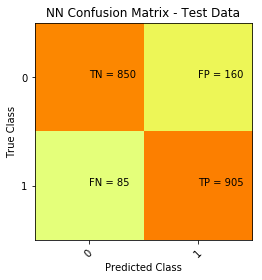

In [144]:
NN_classifier(df_ngram,Y,hidden_layers_ =(20,30,40,50), solver_='adam', activation_= 'tanh' )

Classifying in cluster: 0
[[84 14]
 [ 6 89]]
Accuracy: 0.8963730569948186
Error rate: 0.10362694300518138
Recall: 0.9368421052631579
Precision: 0.8640776699029126


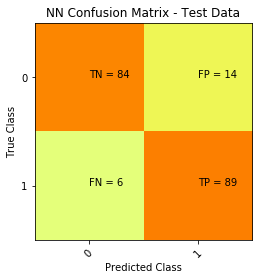

Classifying in cluster: 1
[[21  6]
 [ 1 31]]
Accuracy: 0.8813559322033898
Error rate: 0.11864406779661019
Recall: 0.96875
Precision: 0.8378378378378378


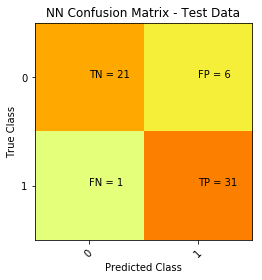

Classifying in cluster: 2
[[21  2]
 [ 2 22]]
Accuracy: 0.9148936170212766
Error rate: 0.08510638297872342
Recall: 0.9166666666666666
Precision: 0.9166666666666666


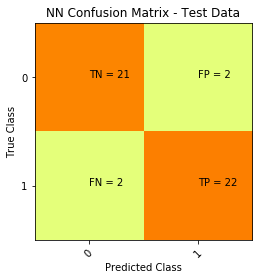

Classifying in cluster: 3
[[ 92  22]
 [ 27 145]]
Accuracy: 0.8286713286713286
Error rate: 0.17132867132867136
Recall: 0.8430232558139535
Precision: 0.8682634730538922


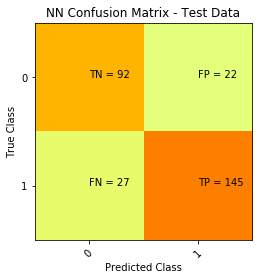

Classifying in cluster: 4
[[214  49]
 [ 29 278]]
Accuracy: 0.8631578947368421
Error rate: 0.13684210526315788
Recall: 0.9055374592833876
Precision: 0.8501529051987767


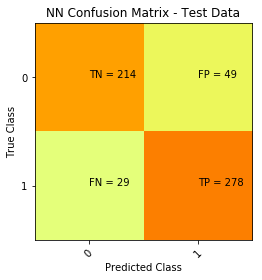

Classifying in cluster: 5
[[226  51]
 [  8 188]]
Accuracy: 0.8752642706131079
Error rate: 0.12473572938689215
Recall: 0.9591836734693877
Precision: 0.7866108786610879


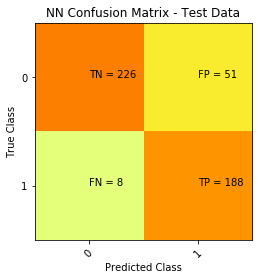

Classifying in cluster: 6
[[34 22]
 [ 9 93]]
Accuracy: 0.8037974683544303
Error rate: 0.19620253164556967
Recall: 0.9117647058823529
Precision: 0.808695652173913


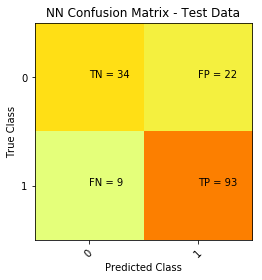

Classifying in cluster: 7
[[109  17]
 [ 14  76]]
Accuracy: 0.8564814814814815
Error rate: 0.1435185185185185
Recall: 0.8444444444444444
Precision: 0.8172043010752689


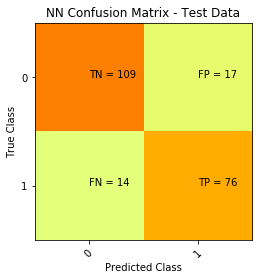

In [145]:
for i in range(0,k):
    df_cluster0 = df_ngram[df_ngram['cluster'] == i]
    Y = pd.Series(Y)
    print('Classifying in cluster: {}'.format(i))
    NN_classifier(df_cluster0.drop('cluster',axis=1),Y.iloc[df_cluster0.index],hidden_layers_ =(20,30,40,50), solver_='adam', activation_= 'tanh' )

[[931  79]
 [208 782]]
Accuracy: 0.8565
Error rate: 0.14349999999999996
Recall: 0.7898989898989899
Precision: 0.908246225319396


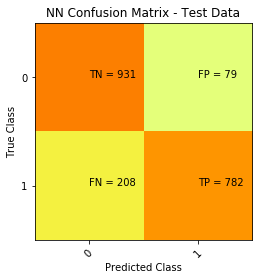

In [146]:
# withou cluster
NN_classifier(df_ngram.drop('cluster',axis=1),Y,hidden_layers_ =(20,30,40,50), solver_='adam', activation_= 'tanh')

In [ ]:
# withou cluster
NN_classifier(df_ngram.drop(['cluster','polarity','subjective'],axis=1),Y,hidden_layers_ =(20,30,40,50), solver_='adam', activation_= 'tanh')

## 6.4 Decision Tree


In [149]:
from sklearn import tree

In [148]:
def DT_clf(X, Y, max_features_= 'auto', 
                  max_depth_ = None,
                  min_sample_leaf_ = 2):
    from sklearn import tree
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=138)

    clf = tree.DecisionTreeClassifier(max_features = max_features_, 
                                     max_depth = max_depth_,
                                     min_samples_leaf = min_sample_leaf_)

    clf.fit(X_train, y_train)
    
    #plot the tree
    #tree.plot_tree(clf.fit(X_train, y_train)) 
    
    y_pred = clf.predict(X_test)
    cm =  metrics.confusion_matrix(y_test, y_pred)
    print(cm)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Error rate:", 1-metrics.accuracy_score(y_test, y_pred))
    print("Recall:", metrics.recall_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred))
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['0','1']
    plt.title('NN Confusion Matrix - Test Data')
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()
    return clf
    

[[871 139]
 [105 885]]
Accuracy: 0.878
Error rate: 0.122
Recall: 0.8939393939393939
Precision: 0.8642578125


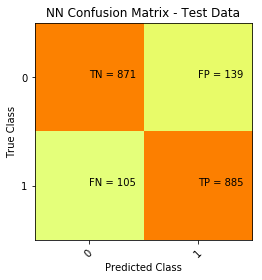

In [164]:
dtmodel = DT_clf(df_pos,Y,min_sample_leaf_= 2, max_depth_ = 15)

Classifying in cluster: 0
[[874 136]
 [ 97 893]]
Accuracy: 0.8835
Error rate: 0.11650000000000005
Recall: 0.902020202020202
Precision: 0.8678328474246841


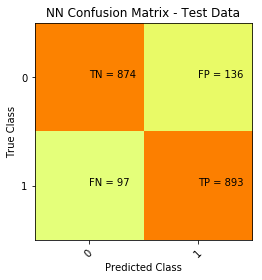

Classifying in cluster: 1
[[876 134]
 [ 84 906]]
Accuracy: 0.891
Error rate: 0.10899999999999999
Recall: 0.9151515151515152
Precision: 0.8711538461538462


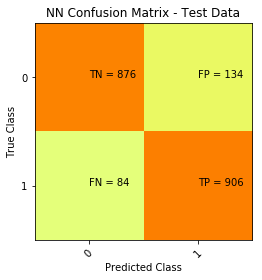

Classifying in cluster: 2
[[870 140]
 [113 877]]
Accuracy: 0.8735
Error rate: 0.12649999999999995
Recall: 0.8858585858585859
Precision: 0.8623402163225172


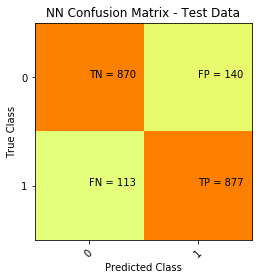

Classifying in cluster: 3
[[872 138]
 [107 883]]
Accuracy: 0.8775
Error rate: 0.12250000000000005
Recall: 0.8919191919191919
Precision: 0.8648383937316356


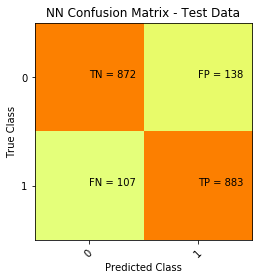

Classifying in cluster: 4
[[875 135]
 [108 882]]
Accuracy: 0.8785
Error rate: 0.12150000000000005
Recall: 0.8909090909090909
Precision: 0.8672566371681416


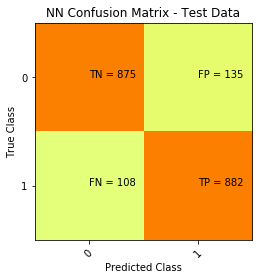

Classifying in cluster: 5
[[866 144]
 [113 877]]
Accuracy: 0.8715
Error rate: 0.12849999999999995
Recall: 0.8858585858585859
Precision: 0.8589618021547503


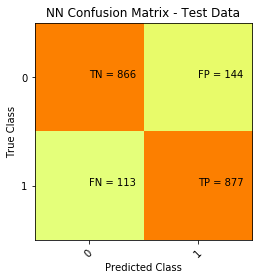

Classifying in cluster: 6
[[864 146]
 [ 95 895]]
Accuracy: 0.8795
Error rate: 0.12050000000000005
Recall: 0.9040404040404041
Precision: 0.8597502401536984


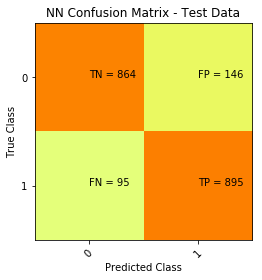

Classifying in cluster: 7
[[864 146]
 [107 883]]
Accuracy: 0.8735
Error rate: 0.12649999999999995
Recall: 0.8919191919191919
Precision: 0.858114674441205


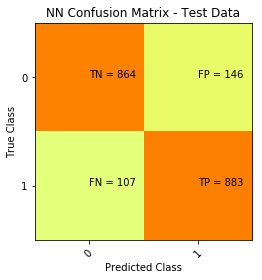

In [173]:
for i in range(0,k):
    df_cluster0 = df_pos[df_pos['cluster'] == i]
    Y = pd.Series(Y)
    print('Classifying in cluster: {}'.format(i))
    dt_k = DT_clf(df_pos.drop('cluster', axis =1),Y,min_sample_leaf_= 2, max_depth_ = 15)

[[849 161]
 [104 886]]
Accuracy: 0.8675
Error rate: 0.13249999999999995
Recall: 0.8949494949494949
Precision: 0.8462273161413563


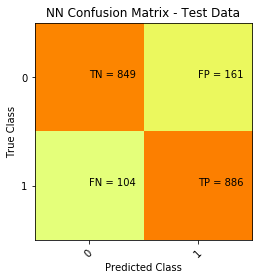

In [178]:
# withou cluster
dtmodel = DT_clf(df_pos.drop(['cluster'],axis=1),Y,min_sample_leaf_= 2, max_depth_ = 15)

### b. Unigram

[[882 128]
 [ 87 903]]
Accuracy: 0.8925
Error rate: 0.10750000000000004
Recall: 0.9121212121212121
Precision: 0.8758486905916586


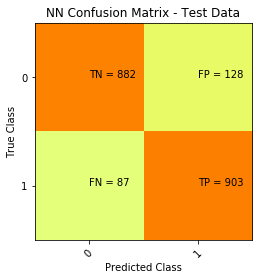

In [172]:
dtmodel = DT_clf(df_ngram,Y,min_sample_leaf_= 2, max_depth_ = 15)

Classifying in cluster: 0
[[85 13]
 [ 6 89]]
Accuracy: 0.9015544041450777
Error rate: 0.0984455958549223
Recall: 0.9368421052631579
Precision: 0.8725490196078431


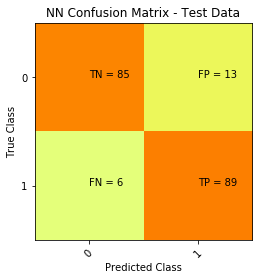

Classifying in cluster: 1
[[25  2]
 [ 2 30]]
Accuracy: 0.9322033898305084
Error rate: 0.06779661016949157
Recall: 0.9375
Precision: 0.9375


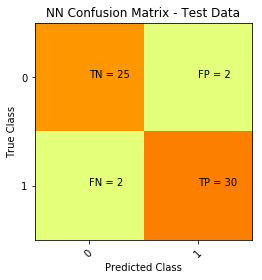

Classifying in cluster: 2
[[22  1]
 [ 8 16]]
Accuracy: 0.8085106382978723
Error rate: 0.19148936170212771
Recall: 0.6666666666666666
Precision: 0.9411764705882353


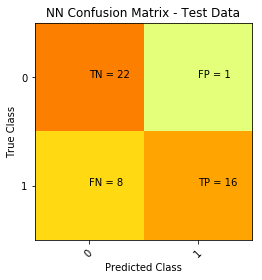

Classifying in cluster: 3
[[ 95  19]
 [ 26 146]]
Accuracy: 0.8426573426573427
Error rate: 0.1573426573426573
Recall: 0.8488372093023255
Precision: 0.8848484848484849


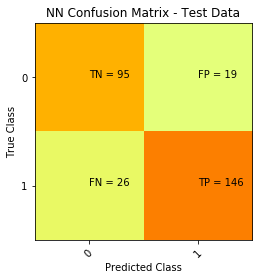

Classifying in cluster: 4
[[235  28]
 [ 65 242]]
Accuracy: 0.8368421052631579
Error rate: 0.16315789473684206
Recall: 0.7882736156351792
Precision: 0.8962962962962963


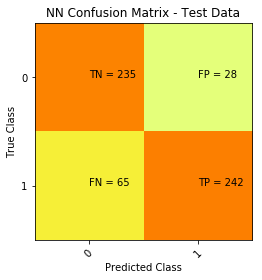

Classifying in cluster: 5
[[247  30]
 [ 21 175]]
Accuracy: 0.8921775898520085
Error rate: 0.10782241014799154
Recall: 0.8928571428571429
Precision: 0.8536585365853658


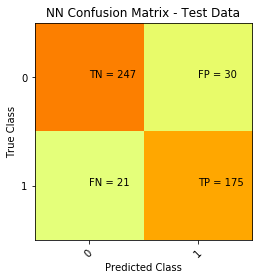

Classifying in cluster: 6
[[41 15]
 [10 92]]
Accuracy: 0.8417721518987342
Error rate: 0.15822784810126578
Recall: 0.9019607843137255
Precision: 0.8598130841121495


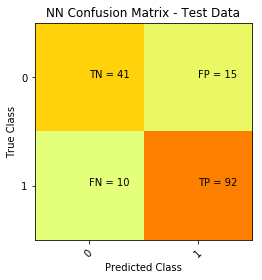

Classifying in cluster: 7
[[105  21]
 [  9  81]]
Accuracy: 0.8611111111111112
Error rate: 0.13888888888888884
Recall: 0.9
Precision: 0.7941176470588235


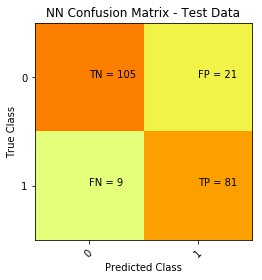

In [176]:
for i in range(0,k):
    df_cluster0 = df_ngram[df_ngram['cluster'] == i]
    Y = pd.Series(Y)
    print('Classifying in cluster: {}'.format(i))
    dt_k = DT_clf(df_cluster0.drop('cluster', axis =1),Y[df_cluster0.index],min_sample_leaf_= 2, max_depth_ = 15)

[[862 148]
 [ 89 901]]
Accuracy: 0.8815
Error rate: 0.11850000000000005
Recall: 0.9101010101010101
Precision: 0.8589132507149666


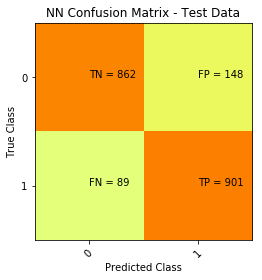

In [179]:
# without cluster
dtmodel = DT_clf(df_ngram.drop(['cluster'],axis=1),Y,min_sample_leaf_= 2, max_depth_ = 15)

[[856 154]
 [ 69 921]]
Accuracy: 0.8885
Error rate: 0.11150000000000004
Recall: 0.9303030303030303
Precision: 0.8567441860465116


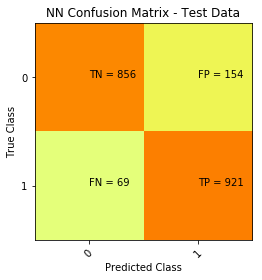

In [181]:
# dt for visualize
# chosing 5 level of depth 
dtmodel = DT_clf(df_ngram,Y,min_sample_leaf_= 2, max_depth_ = 10)

In [183]:
import graphviz 
from IPython.display import SVG
#from StringIO import StringIO

dot_data= tree.export_graphviz(dtmodel, out_file="ngram_8cluster.dot",
                               feature_names=df_ngram.columns) 



In [166]:
# import os
# #./usr/lib/x86_64-linux-gnu/graphviz
# os.environ["PATH"] += os.pathsep + './usr/bin/'

In [ ]:
# with open("mytree.dot") as f:
#     dot_graph = f.read()
# #graphviz.Source(dot_graph)
# graph = graphviz.Source(dot_graph)
# graph.render("image",view=True)

### z. Feed Forward Neural Network

In [ ]:
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.utils import to_categorical


In [ ]:
# construct a neural network

# Set the number of features we want
number_of_features = len(df_pos.columns)

# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=2, activation='relu', input_shape=(number_of_features,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=2, activation='relu'))

# Add fully connected layer with a softmax activation function
network.add(layers.Dense(units=2, activation='softmax'))

# Compile neural network
network.compile(loss='categorical_crossentropy', # Cross-entropy
                optimizer='rmsprop', # Root Mean Square Propagation
                metrics=['accuracy']) # Accuracy performance metric

In [ ]:
# Train neural network
y_binary = to_categorical(Y)

X_train, X_test, y_train, y_test = train_test_split(df_pos, y_binary, test_size=0.20,random_state=138) 
scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

history = network.fit(X_train, # Features
                      y_train, # Target vector
                      epochs=3, # Three epochs
                      verbose=0, # No output
                      batch_size=100, # Number of observations per batch
                      validation_data=(X_test, y_test)) # Data to use for evaluation

In [ ]:
y_predict = network.predict(X_test)

In [ ]:
_, accuracy = network.evaluate(x=X_test, y=y_test  )
print('Accuracy: %.2f' % (accuracy*100))

In [ ]:
#### fit model
# Train neural network
def FNN_classifier():
    history = network.fit(train_features, # Features
                          train_target, # Target vector
                          epochs=3, # Three epochs
                          verbose=0, # No output
                          batch_size=100, # Number of observations per batch
                          validation_data=(test_features, test_target)) # Data to use for evaluation

## 6.XXXNB model with TF-IDF

In [139]:
# test SVM model with different way
# split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(df_pos, Y, test_size=0.20,random_state=109)  

In [140]:
import time
from sklearn.naive_bayes import MultinomialNB
start_time = time.time()
scaler = StandardScaler()  
scaler.fit(df_pos)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

clf = MultinomialNB().fit(X_train, y_train)
y_pred = clf.predict(X_test)



ImportError: cannot import name '_check_sample_weight'

In [ ]:
print(metrics.accuracy_score(y_pred=y_pred, y_true=y_test))

In [ ]:
type(X_train)

# ##### Model 2: using combination Text and non-text features

# using mapper to map features to dataframe
mapper = DataFrameMapper([
     ('description', TfidfVectorizer()),
     ('nb_like', None),
     ('picture_labels', TfidfVectorizer()),
     ('nb_share', None),
     ('user', None),
     ('month', None),
     ('day', None),
     ('hour', None),
 ])

In [ ]:
from sklearn_pandas import DataFrameMapper, cross_val_score
from sklearn.metrics import classification_report
import sklearn.ensemble as sk

In [ ]:
def printreport(exp, pred):
    print(pd.crosstab(exp, pred, rownames=['Actual'], colnames=['Predicted']))

    print('\n \n')
    print(classification_report(exp, pred))


In [ ]:
data2 = df[['rating', 'usefulCount','coolCount','funnyCount']].copy()

data2['reviewContent'] = processed
data2['sentiment'] =sent_analysis

In [ ]:
type(CS_similarity)

In [ ]:
print(data2.index)

In [ ]:
X_tfidf= tfidf.fit_transform(data2['reviewContent'])

In [ ]:
mapper = DataFrameMapper([
     ('rating', None),
     ('usefulCount', None),
     ('coolCount', None),
     ('funnyCount', None),
     ('reviewContent', TfidfVectorizer()),
     ('sentiment', None)
     #('reviewContent', [CountVectorizer(analyzer='word', ngram_range=(2, 2)),TfidfVectorizer()])

 ])

In [ ]:
features = mapper.fit_transform(data2)

In [ ]:
features.shape

In [ ]:
#integrate cosine similarity into features
features=np.concatenate((features, CS_similarity), axis=1)

In [ ]:
features.shape

In [ ]:
# Split the data between train and test
X_train, X_test, y_train, y_test = train_test_split(features, Y, test_size=0.20,random_state=109)  

start_time = time.time()
clf = sk.RandomForestClassifier(random_state=0, n_estimators=70)
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)

printreport(y_test, predicted)
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
print(metrics.accuracy_score(y_pred=predicted, y_true=y_test))